The market research team at AdRight is assigned the task to identify the profile of the typical customer for each treadmill product offered by CardioGood Fitness. The market research team decides to investigate whether there are differences across the product lines with respect to customer characteristics. The team decides to collect data on individuals who purchased a treadmill at a CardioGoodFitness retail store during the prior three months. The data are stored in the CardioGoodFitness.csv file. The team identifies the following customer variables to study: product purchased, TM195, TM498, or TM798; gender; age, in years;education, in years; relationship status, single or partnered; annual household income ($); average number of times the customer plans to use the treadmill each week; average number of miles the customer expects to walk/run each week; and self-rated fitness on an 1-to-5 scale, where 1 is poor shape and 5 is excellent shape.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
df = pd.read_csv('C:/Users/u148533/CardioGoodFitness.csv')

In [7]:
df.head

<bound method NDFrame.head of     Product  Age  Gender  Education MaritalStatus  Usage  Fitness  Income  \
0     TM195   18    Male         14        Single      3        4   29562   
1     TM195   19    Male         15        Single      2        3   31836   
2     TM195   19  Female         14     Partnered      4        3   30699   
3     TM195   19    Male         12        Single      3        3   32973   
4     TM195   20    Male         13     Partnered      4        2   35247   
..      ...  ...     ...        ...           ...    ...      ...     ...   
175   TM798   40    Male         21        Single      6        5   83416   
176   TM798   42    Male         18        Single      5        4   89641   
177   TM798   45    Male         16        Single      5        5   90886   
178   TM798   47    Male         18     Partnered      4        5  104581   
179   TM798   48    Male         18     Partnered      4        5   95508   

     Miles  
0      112  
1       75  
2     

In [8]:
df.describe()

,Age,Education,Usage,Fitness,Income,Miles
count,180.000000,180.000000,180.000000,180.000000,180.000000,180.000000
mean,28.788889,15.572222,3.455556,3.311111,53719.577778,103.194444
std,6.943498,1.617055,1.084797,0.958869,16506.684226,51.863605
min,18.000000,12.000000,2.000000,1.000000,29562.000000,21.000000
25%,24.000000,14.000000,3.000000,3.000000,44058.750000,66.000000
50%,26.000000,16.000000,3.000000,3.000000,50596.500000,94.000000
75%,33.000000,16.000000,4.000000,4.000000,58668.000000,114.750000
max,50.000000,21.000000,7.000000,5.000000,104581.000000,360.000000


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [10]:
df.drop_duplicates()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47
...,...,...,...,...,...,...,...,...,...
175,TM798,40,Male,21,Single,6,5,83416,200
176,TM798,42,Male,18,Single,5,4,89641,200
177,TM798,45,Male,16,Single,5,5,90886,160
178,TM798,47,Male,18,Partnered,4,5,104581,120


In [11]:
df.nunique()

Product           3
Age              32
Gender            2
Education         8
MaritalStatus     2
Usage             6
Fitness           5
Income           62
Miles            37
dtype: int64

In [12]:
df['Product'].value_counts()

TM195    80
TM498    60
TM798    40
Name: Product, dtype: int64

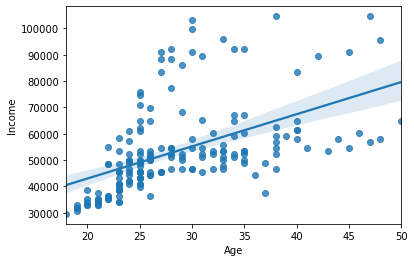

In [13]:
sns.regplot(data=df,x='Age',y='Income')
plt.show()

We see a slight positive correlation between age and income, could potentially target sales towards older individuals who have more income.  They also potentially have more time to exercise if their working hours are more set than a younger person getting into the workforce

<AxesSubplot:xlabel='Product', ylabel='count'>

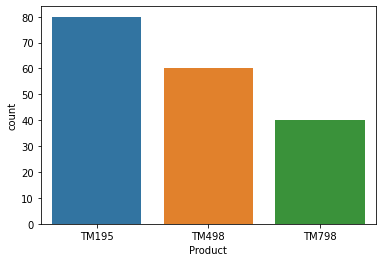

In [14]:
sns.countplot(data=df,x='Product')

The TM195 was the most popular product, about 20 more of them were sold than the next most popular one, the TM498

<AxesSubplot:xlabel='Product', ylabel='Count'>

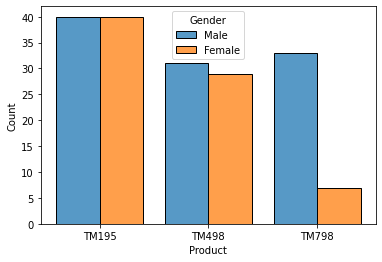

In [20]:
sns.histplot(data=df,x='Product',hue='Gender',multiple='dodge',shrink=.8)

The TM195 and TM498 were similarly popular between men and women, however hte TM798 was about 6 times as popular with men than it was with women

<AxesSubplot:xlabel='Gender', ylabel='Count'>

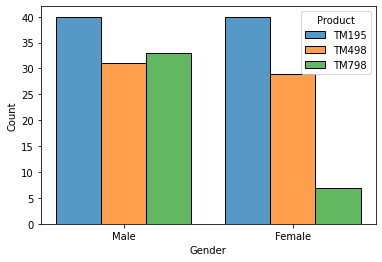

In [21]:
sns.histplot(data=df,x='Gender',hue='Product',multiple='dodge',shrink=.8)

We can see that more products were purchased by men overall (57% of purchases)

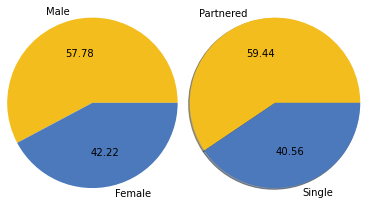

In [22]:
marital = df.MaritalStatus.value_counts()
gender = df.Gender.value_counts()

fig, axs = plt.subplots(1, 2)
axs[0].pie(data=gender, x=gender.values, labels=gender.index, radius=1.4, colors=['#f2bd1d', '#4B79BB'],autopct='%.2f')
axs[1].pie(data=marital, x=marital.values, labels=marital.index, radius=1.4,\
           autopct='%.2f', shadow=True, colors=['#f2bd1d', '#4B79BB'])
plt.show()

Products were also more popular with partnered individuals.  It may make sense that people who are single are less interested in at home equipment and may make use of gym memberships instead

<AxesSubplot:xlabel='Product', ylabel='Count'>

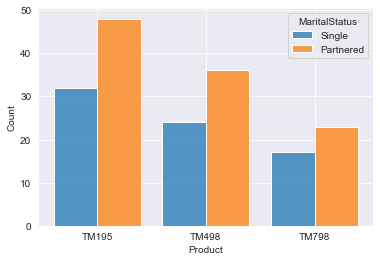

In [30]:
sns.histplot(x='Product',hue='MaritalStatus',multiple='dodge',data=df,binwidth=2,shrink=.8)

Here we see that each of the three products are more popular with partnered individuals than with single individuals, and that the disparity in popularity is similar for each of the three products

<AxesSubplot:xlabel='Product', ylabel='Count'>

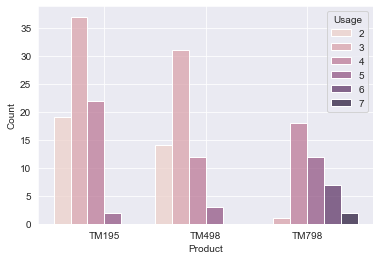

In [25]:
sns.set_style('darkgrid')
sns.histplot(data=df,x='Product',hue='Usage',multiple='dodge')

We can see that the TM195 and TM498 have significantly more people using them, however the TM798 is used way more often by the individuals who do have it.  There could be a difference in casual exercise vs more serious/consistent individual.  Sales of specific equipment could be marketed towards the individuals who would be more likely to use it more frequently; i.e. - somebody who works out very frequently would likely be more interested in the TM798 than the TM195.

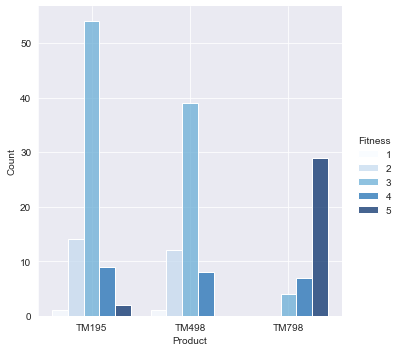

In [29]:
sns.displot(data=df,x='Product',hue='Fitness',multiple='dodge', palette='Blues',shrink=.8)

The previous figure is supported by this one, where individuals who self-rated their physical fitness highly also disproportionately use the TM798, whereas individuals who used the TM195 and TM498 rated themselves to be of poor to moderate physical fitness

<AxesSubplot:xlabel='Fitness', ylabel='Miles'>

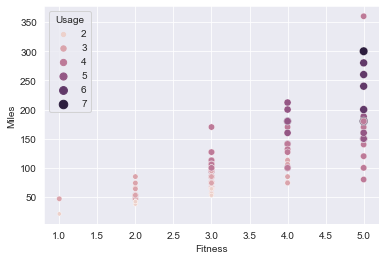

In [33]:
sns.scatterplot(data=df, x="Fitness", y="Miles", hue="Usage", size="Usage")

Finally, we see that individuals who rated themselves highly in self fitness were both more likely to use the equipment more frequently during the week and also use it for longer periods of time during each session.  While it may make sense to target sales towards individuals who are in worse shape, it seems like they use the equipment less often.  Individuals who use the equipment more frequently may be targeted as repeated buyers.  